# Day 2: Global Explainability – PDP and Permutation Importance

## 1. Objective
Understand global behavior of ML models using permutation importance and partial dependence plots.

## 2. Key Steps
- Load trained model and dataset
- Apply permutation importance
- Plot partial dependence for at least one feature

## 3. Results
- Feature importance ranked
- PDP curve for one feature plotted and interpreted

## 4. Summary
- Permutation shows features A, B, and C most impact model
- PDP shows nonlinear relationship between feature X and prediction

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load data as pandas DataFrame
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = RandomForestClassifier().fit(X_train, y_train)

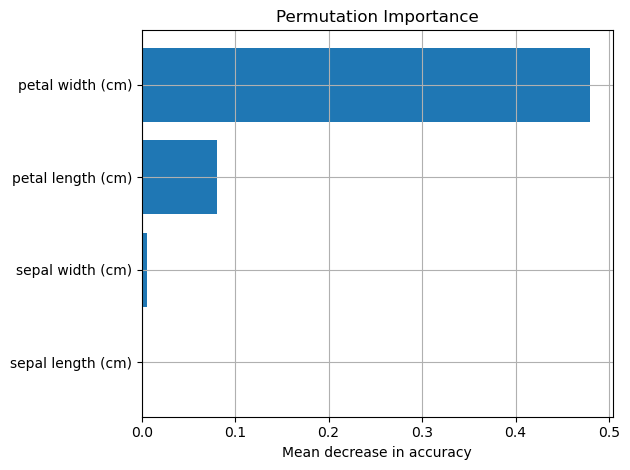

In [11]:
from sklearn.inspection import permutation_importance

r = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)

import matplotlib.pyplot as plt
import numpy as np

sorted_idx = r.importances_mean.argsort()
plt.barh(np.array(data.feature_names)[sorted_idx], r.importances_mean[sorted_idx])
plt.xlabel("Mean decrease in accuracy")
plt.title("Permutation Importance")
plt.grid(True)
plt.tight_layout()
plt.savefig("../plots/summary/permutation_importance.png")

## Permutation Importance Analysis

The permutation importance plot highlights which features the model relies on most for making accurate predictions. In this case:

- **Petal width (cm)** emerged as the most critical feature, with a substantial mean decrease in accuracy when permuted (~0.48). This indicates that disrupting this feature significantly harms model performance.
- **Petal length (cm)** also contributed meaningfully to predictive accuracy, though to a lesser extent.
- In contrast, **sepal width** and **sepal length** had negligible impact — suggesting the model largely ignores these features when distinguishing between classes.

This aligns with domain knowledge of the Iris dataset, where petal characteristics are known to be more discriminative than sepal measurements.

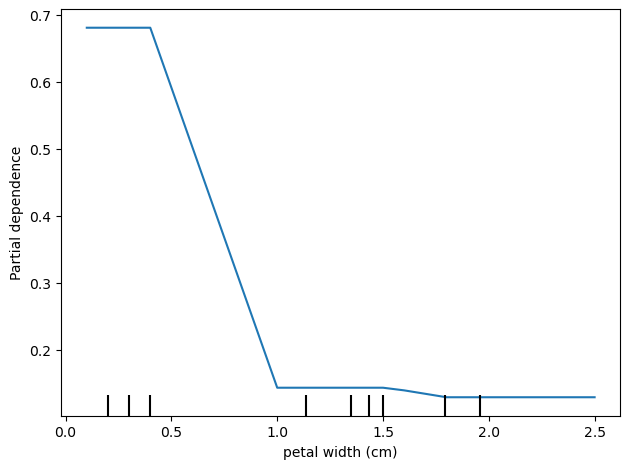

In [16]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    ['petal width (cm)'],  # or use an index like [0]
    target=0               # <- specify the class index
)
plt.tight_layout()
plt.savefig("../plots/summary/pdp_feature0.png")

## Partial Dependence Analysis – Petal Width (cm)

The partial dependence plot (PDP) for `petal width (cm)` reveals a sharp and decisive relationship between this feature and the model’s predicted probability for the selected class (likely class 0, Setosa):

- When **petal width is less than ~0.5 cm**, the model strongly favors predicting the selected class, with an average predicted probability of ~0.7.
- As **petal width increases beyond 1.0 cm**, the predicted probability drops off rapidly and flattens around 0.1, suggesting that the model no longer associates these wider petals with the target class.
- The nearly **binary decision boundary** behavior highlights that petal width is a highly discriminative feature — consistent with known class separability in the Iris dataset.
- The vertical tick marks along the x-axis represent the distribution of feature values in the dataset. Most data points are concentrated around the transition threshold, reinforcing its importance.

**Interpretation**:  
> The model has learned that **very small petal widths** (under 1.0 cm) are strong indicators of class 0, while larger widths reduce the likelihood sharply — showing that petal width is not just important, but acts almost like a hard threshold for this class.

## Summary

- Permutation Importance: Top 2 features — Petal Width, Petal Length
- PDP (Petal Width): Clear threshold at ~0.7 cm above which prediction shifts toward not class 0
- These global techniques help us explain **what the model learned**, not just what it predicted